# Mathematics behind the Neural Network

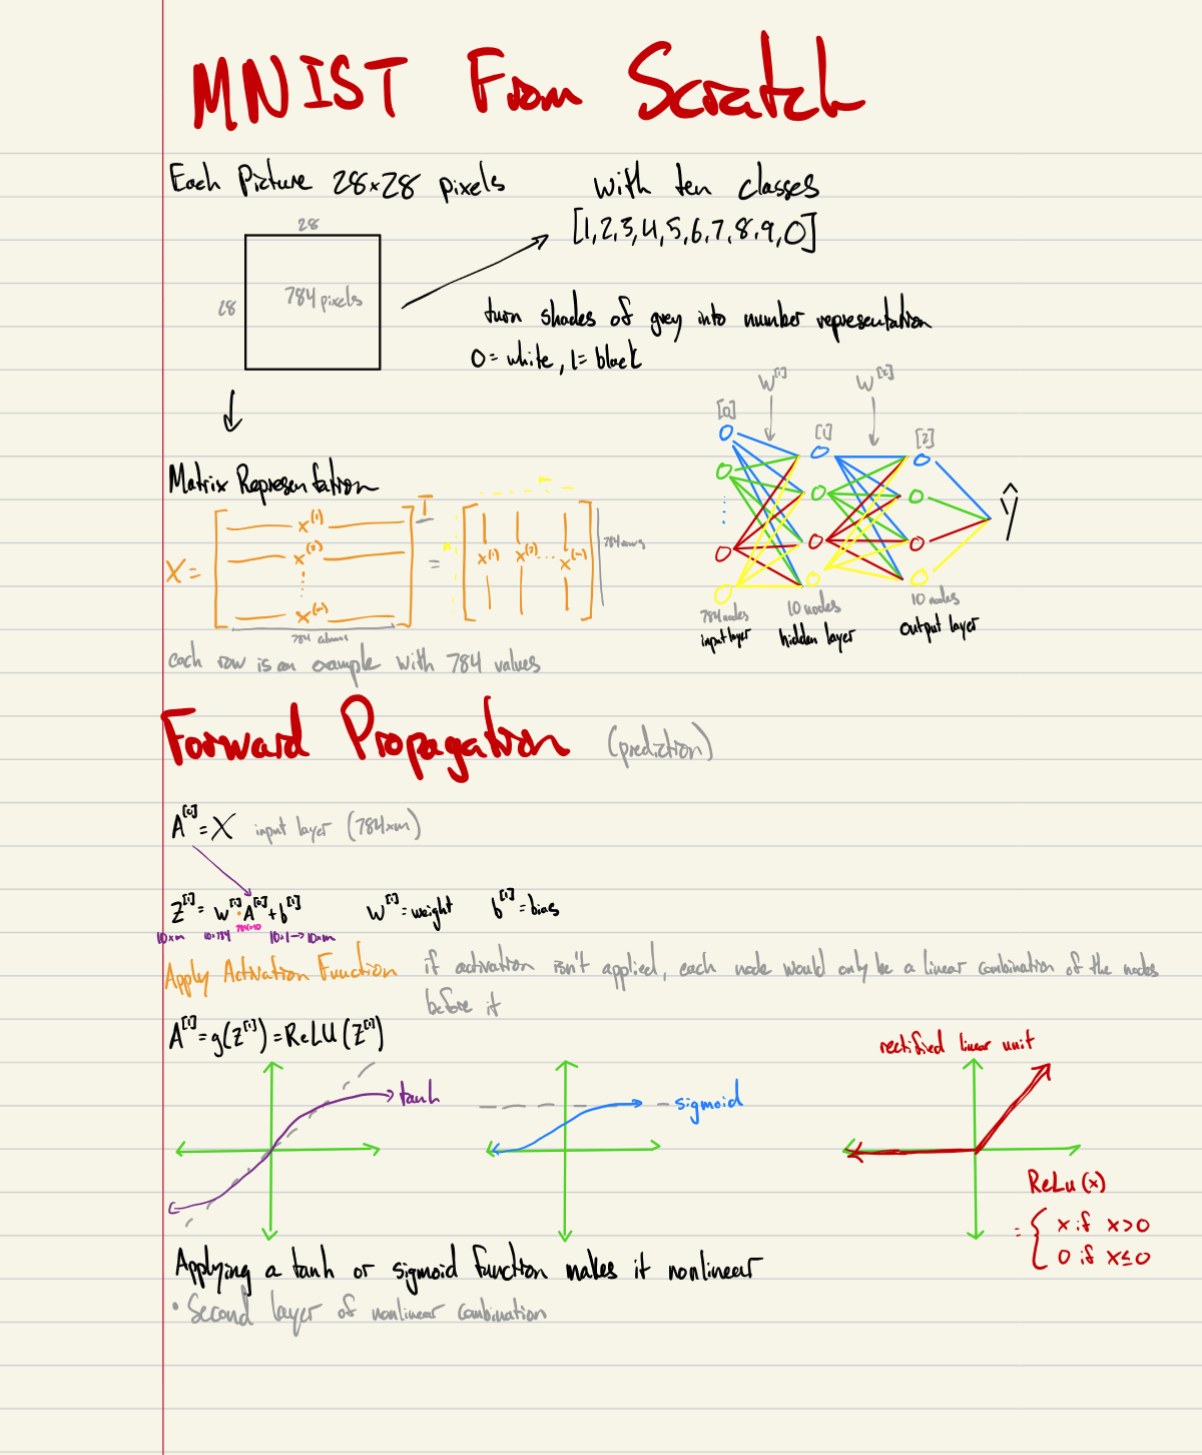

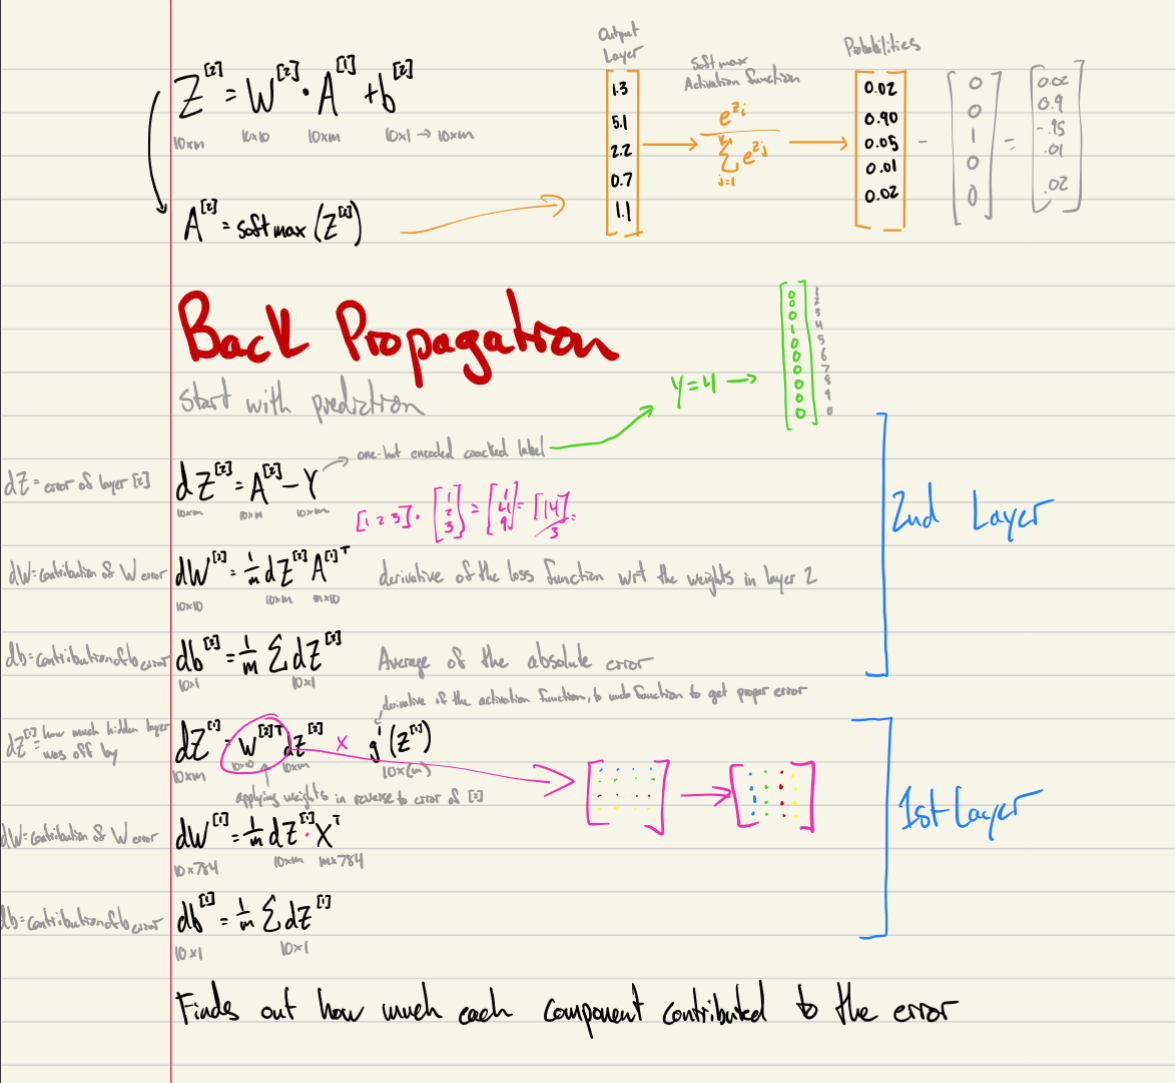

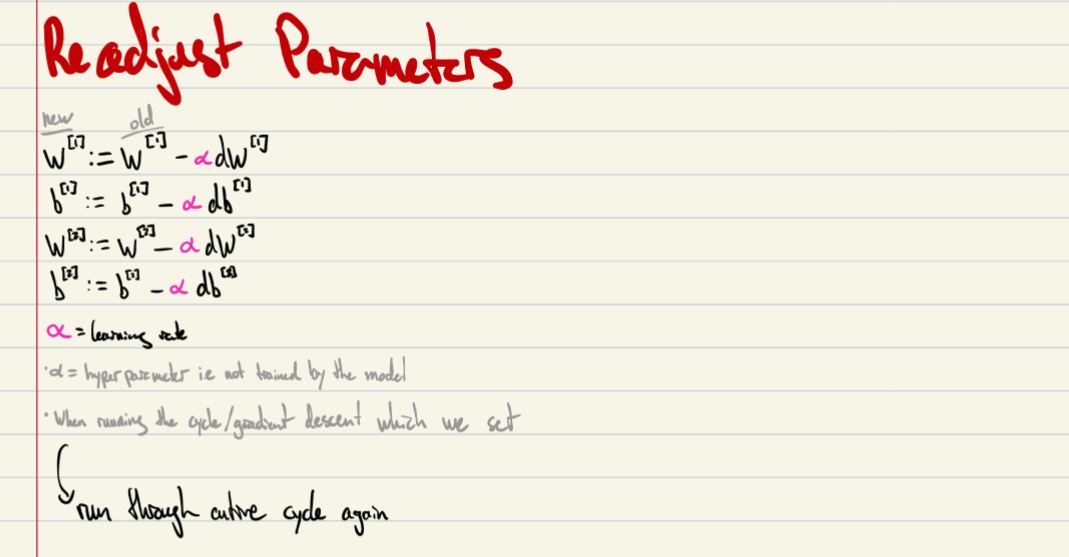

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt  
import warnings

## Import and convert data

In [2]:
df = pd.read_csv('train.csv')  
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(df) 
m, n = data.shape #m = rows, n = columns
np.random.shuffle(data) 

data_dev = data[0:1000].T 
y_dev = data_dev[0] 
X_dev = data_dev[1:n] 
n, m 

data_train = data[1000:m].T 
y_train = data_train[0] 
X_train = data_train[1:n]   
X_train = X_train / X_train.max() # convert into percentages

## Set Parameters

In [4]:
def init_params(): 
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2 

### defining equations 

In [5]:
# reLU(x) = x if x > 0, 0 if x <= 0 (for nonlinear combinations)
def ReLU(Z): 
    return np.maximum(Z, 0)  

#softmax for converting magnitudes into probabilities  
def softmax(Z): 
    return np.exp(Z) / sum(np.exp(Z)) 

#converting labels into matrix values (one-hot encoding) 
def one_hot(Y): 
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 
    one_hot_Y = one_hot_Y.T 
    return one_hot_Y 

#derivative of reLU(x) 
def deriv_ReLU(Z): 
    return Z > 0

## Set Forward Propagation

In [6]:
def forward_prop(W1, b1, W2, b2, X):  
    Z1 = W1.dot(X) + b1 
    A1 = ReLU(Z1) 
    Z2 = W2.dot(A1) + b2 
    A2 = softmax(Z2) 
    return Z1, A1, Z2, A2

## Set Backward Propagation 

In [7]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y): 
    m = Y.size
    one_hot_Y = one_hot(Y) 
    dZ2 = A2 - one_hot_Y 
    dW2 = (1/m) * dZ2.dot(A1.T)  
    db2 = (1/m) * np.sum(dZ2) 
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T) 
    db1 = (1/m) * np.sum(dZ1) 
    return dW1, db1, dW2, db2 
    

## updating parameters

In [8]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):  
    W1 = W1 - alpha * dW1 
    b1 = b1 - alpha * db1 
    W2 = W2 - alpha * dW2 
    b2 = b2 - alpha * db2 
    return W1, b1, W2, b2 

## Ensemble

In [9]:
def get_predictions(A2): 
    return np.argmax(A2, 0) 

def get_accuracy(predictions, Y): 
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size 

def gradient_descent(X, Y, iterations, alpha):   
    warnings.filterwarnings('ignore')
    W1, b1, W2, b2 = init_params() 
    for i in range(iterations):   
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) 
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y) 
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)   
        if i % 10 == 0: 
            print("Iteration: {}".format(i))
            print("Accuracy: {}".format(get_accuracy(get_predictions(A2), Y)))  
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.1) 

Iteration: 0
[2 2 2 ... 2 2 2] [7 5 7 ... 8 1 4]
Accuracy: 0.07282926829268292
Iteration: 10
[2 4 7 ... 8 5 8] [7 5 7 ... 8 1 4]
Accuracy: 0.11287804878048781
Iteration: 20
[2 8 7 ... 5 5 8] [7 5 7 ... 8 1 4]
Accuracy: 0.19239024390243903
Iteration: 30
[2 8 7 ... 8 5 8] [7 5 7 ... 8 1 4]
Accuracy: 0.2680487804878049
Iteration: 40
[2 8 7 ... 8 5 9] [7 5 7 ... 8 1 4]
Accuracy: 0.34553658536585363
Iteration: 50
[2 8 7 ... 8 5 9] [7 5 7 ... 8 1 4]
Accuracy: 0.40070731707317075
Iteration: 60
[5 1 7 ... 8 5 9] [7 5 7 ... 8 1 4]
Accuracy: 0.4424878048780488
Iteration: 70
[5 1 7 ... 8 5 9] [7 5 7 ... 8 1 4]
Accuracy: 0.4816829268292683
Iteration: 80
[5 1 7 ... 8 5 4] [7 5 7 ... 8 1 4]
Accuracy: 0.5164634146341464
Iteration: 90
[5 1 7 ... 8 5 4] [7 5 7 ... 8 1 4]
Accuracy: 0.5472682926829269
Iteration: 100
[5 1 7 ... 8 1 4] [7 5 7 ... 8 1 4]
Accuracy: 0.5745365853658536
Iteration: 110
[5 1 7 ... 8 1 4] [7 5 7 ... 8 1 4]
Accuracy: 0.5973414634146341
Iteration: 120
[5 1 7 ... 8 1 4] [7 5 7 ... 8 

In [11]:
W1, b1, W2, b2

(array([[ 0.19882235, -0.08655068,  0.0084799 , ..., -0.23057821,
          0.06868751, -0.25510051],
        [ 0.29815787, -0.40835566,  0.05831212, ...,  0.16588466,
          0.19832929, -0.18437388],
        [ 0.31766801,  0.33730343,  0.02233859, ...,  0.41764756,
         -0.34224432,  0.33576876],
        ...,
        [ 0.13202855, -0.34493678,  0.23322482, ...,  0.13445618,
         -0.43343849,  0.34942098],
        [-0.03798214, -0.14688884,  0.35735274, ...,  0.07750441,
         -0.28738496, -0.1335068 ],
        [ 0.07002765, -0.07299603,  0.49731042, ...,  0.19400486,
          0.18631513,  0.47775262]]),
 array([[0.47340988],
        [0.25000632],
        [0.77540709],
        [0.95755143],
        [0.85058075],
        [0.49069496],
        [0.43542893],
        [0.38081543],
        [0.48800518],
        [0.07703497]]),
 array([[-0.0793451 ,  0.23509617, -0.29980388, -0.18112996,  0.78258695,
         -0.34480251, -0.6122358 , -0.2016649 , -0.24577206,  0.09692981],
  

In [ ]:
def predict(X, W1, b1, W2, b2): 
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X) 
    return get_predictions(A2)